This notebook shows the solutions found to the tasks given in the problem set. The solutions for the equations of motion found with their respective hamiltonians are approximated over small timesteps. The output is the path the spacecraft takes, plots are generated.

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import matplotlib.patches as patches
import numpy as np
from math import sqrt
from math import exp 
from math import sin,cos
mu = 0.05


def omega(x,y):
    return round(0.5*(x**2+y**2) + (1-mu)/sqrt((x+mu)**2+y**2)+ (mu)/sqrt((x-1+mu)**2+y**2)+mu*(1-mu)/2 ,4)
def energy(x,y,x_punkt,y_punkt):
    return round(omega(x,y)-0.5*(x_punkt**2+y_punkt**2),4)
def e_kin(x_punkt,y_punkt):
    return round(0.5*(x_punkt**2+y_punkt**2),4)

In [2]:
#plotting routine 

def plot_dat(y0, EnergyPlot, MoonZoom, Crash=False):
    xlim = 1.5
    ylim = 1
    xsize=xlim*10
    
    plt.figure(figsize=(xsize,xsize/(xlim/ylim)),dpi=300) 
    #plt.figure()
    ax=plt.gca()
    plt.plot(y0[0],y0[1], 'b', label='x(t)',alpha=0.9) 
    for j in range(len(y0[0])):
        if j%20000==0:
            plt.annotate(str(j),(y0[0][j],y0[1][j]),size=15)
            
    if Crash:
        plt.annotate("crashed\n after " + str(len(y0[0]))+ " steps",(y0[0][-1],y0[1][-1]) , bbox=dict(boxstyle="round", fc="1.0", ec="gray"),
            xytext=(-30, 20), textcoords='offset points', ha='center',size=15,
            arrowprops=dict(arrowstyle="->")
                    )
    plt.scatter(y0[0][0],y0[1][0],s=10,label="Start", color="r")
    plt.scatter(-mu,0,s=100,label="Earth")
    plt.scatter(0.744-mu,0,s=20,label="L1",color="c")
    plt.scatter(1-mu,0,s=20,label="Moon",color="k")
    #plt.legend(loc='best')
    plt.xlabel('x')
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    ax.add_patch(patches.Circle((-mu,0), radius=0.2, fill=None))
    ax.add_patch(patches.Circle((1-mu,0), radius=0.01, color="k", fill=None))
    plt.ylabel('y')
    plt.legend()
    
    #dieser Teil hier dauert so lange
    if EnergyPlot:
        for x_value in np.linspace(-xlim,xlim,70):
            for y_value in np.linspace(-ylim,ylim,70):
                if omega(x_value,y_value)>=E:
                    plt.scatter(x_value,y_value,s=5,color="g",alpha=0.7)

    plt.grid()
    plt.show()
    
    
    
    if MoonZoom:
        plt.close()
        xlim = 1.2
        ylim = 0.25
        plt.figure(figsize=(10,10))#,dpi=100)
        #plt.figure()
        ax=plt.gca()
        plt.plot(y0[0],y0[1], 'b', label='x(t)',alpha=0.9) #0 and 2 are the x and y variables, respectively - place
        plt.scatter(y0[0][0],y0[1][0],s=10,label="Start", color="r")
        plt.scatter(-mu,0,s=100,label="Earth")
        plt.scatter(0.744-mu,0,s=20,label="L1",color="c")
        plt.scatter(1-mu,0,s=20,label="Moon",color="k")
        #plt.legend(loc='best')
        plt.xlabel('x')
        plt.xlim(0.6, xlim)
        plt.ylim(-ylim, ylim)
        ax.add_patch(patches.Circle((-mu,0), radius=0.2, fill=None))
        ax.add_patch(patches.Circle((1-mu,0), radius=0.01, color="k", fill=None))
        plt.ylabel('y')

        #hill region around x0,y0
        # hier dauerts auch wieder lange 
        for x_value in np.linspace(0.6,xlim,70):
            for y_value in np.linspace(-ylim,ylim,70):
                if omega(x_value,y_value)>=E:
                    plt.scatter(x_value,y_value,s=2,color="g",alpha=0.7)

        plt.grid()
        plt.show()

In [3]:
#positions and velocities

def x1(t,vec):  #t ist hier nur das delta. es gibt kein globales t
    return 0.5*(vec[2]+vec[1])*sin(2*t) + 0.5*(vec[3]-vec[0])*(1-cos(2*t))+vec[0]

def x1_punkt(t,vec):
    return (vec[2]+vec[1])*cos(2*t) + (vec[3]-vec[0])*sin(2*t)

def y1(t,vec):
    return 0.5*(vec[2]+vec[1])*(cos(2*t)-1) + 0.5*(vec[3]-vec[0])*(sin(2*t))+vec[1]

def y1_punkt(t,vec):
    return -(vec[2]+vec[1])*sin(2*t) + (vec[3]-vec[0])*cos(2*t)



def advance_H1_neu(vec,delta):
    
    """Advancing the equations of motion with respect to H_1 by delta/2"""
    vec_copy = np.copy(vec)
    
    #neu_2
    vec = [0,0,0,0]
    vec[0] = x1(delta,vec_copy)  
    vec[1] = y1(delta,vec_copy)
    vec[2] = x1_punkt(delta,vec_copy)-y1(delta,vec_copy)
    vec[3] = y1_punkt(delta,vec_copy)+x1(delta,vec_copy)  
    
    return vec

\begin{align}
    p_x &= \dot{x}-y \label{eq:p_x}\\
    p_y & = \dot{y}+x \label{eq:p_y}\\
    \dot{p_x} &= \dot{y} \\
    \dot{p_y} &= -\dot{x}
    \label{eq:p}
\end{align}


\begin{align}
\begin{split}
x(t)&= \frac{1}{2} c_2 \sin(2t) + \frac{1}{2} c_4 (1-\cos(2t)) + c_1\\
\dot x(t)&= c_2 \cos(2t) + c_4 \sin(2t)\\
y(t) &= \frac{1}{2} c_2  (\cos(2t)-1) + \frac{1}{2} c_4 \sin(2t) + c_3\\
\dot y(t)&= -c_2 \sin(2t) + c_4 \cos(2t)
\end{split}
\label{eq:exakt}
\end{align}

\begin{align}
c_1 &= x(t=0) = x_0 \\
c_3 &= y(t=0) = y_0 
\end{align}


\begin{align}
    c_2 &= \dot{x}(t=0) \hspace{0.1cm} = \hspace{0.1cm}  p_x(t=0) + y(t=0) =  p_{x,0}+y_0 \\
\end{align}

\begin{align}
    c_4 &= \dot{y}(t=0)\hspace{0.1cm} =\hspace{0.1cm} p_y(t=0) - x(t=0) =  p_{y,0}-x_0 \\
    \label{eq:konstanten2}
\end{align}

In [4]:
def advance_H2_neu(vec):   #with half delta
    
    """Advancing the equations of motion with respect to H_2 by delta/2"""
    
    vec_copy = np.copy(vec)
    
    x=vec_copy[0]    # x(t) = x_0
    y=vec_copy[1]    # y(t) = y_0
    
    
    vec[2] += (0.5*delta*(
        -mu*(mu+x-1)/((mu+x-1)**2+y**2)**(1.5) - (1-mu)*(mu+x)/((mu+x)**2+y**2)**(1.5)  + x)   # -()-()+x ist richtig!!!
                  )
    
    
    vec[3] += (0.5*delta*(
        -mu*y/((mu+x-1)**2+y**2)**(1.5)        - (1-mu)*y/((mu+x)**2+y**2)**(1.5)  + y)
                  )
    
    
    return vec

----------

Aufgabe 7
----------

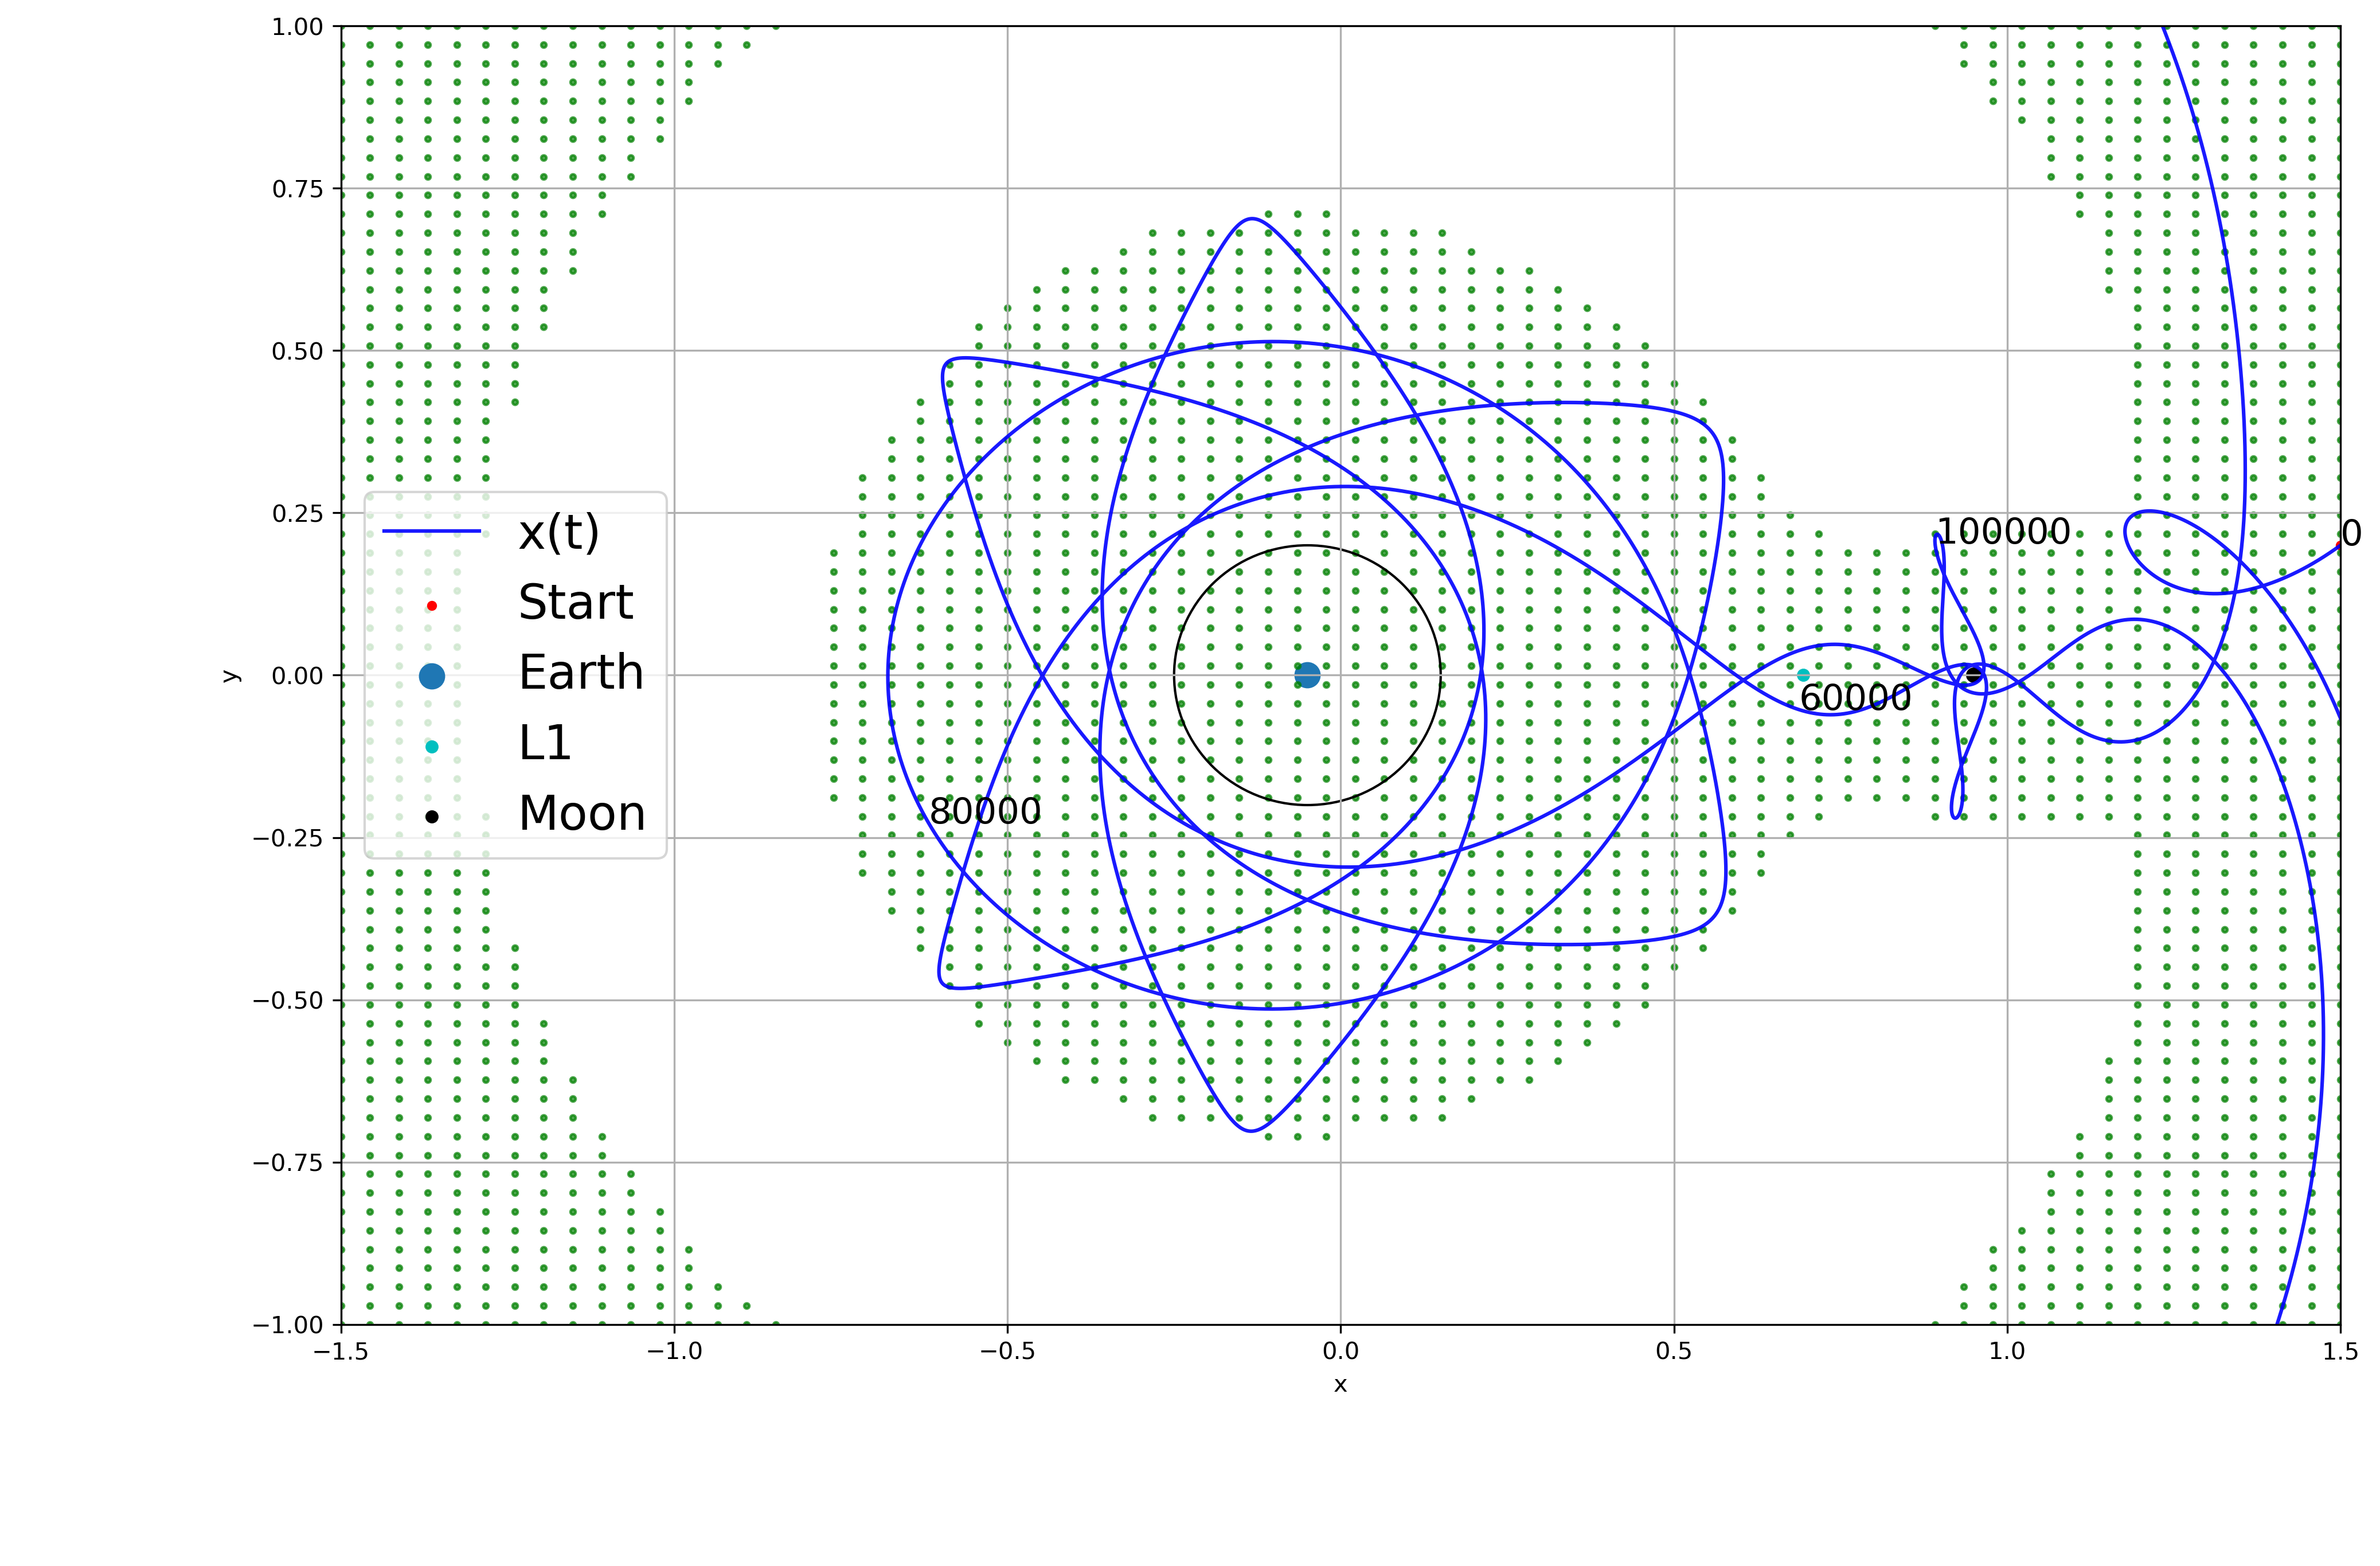

In [36]:
#aufgabe 7
x0   =  0-mu
y_20 = -0.2
x_dot_0 = 2.37
y_dot_0 = -0.79  

p_x_0= x_dot_0-y_20                 # x_dot - y
p_y_0   = y_dot_0+x0

#Impulse: 2.400000000000005 0.400000000000003




x0   =  1.5
y_20 = 0.2
x_dot_0 = -0.5217619985180384
y_dot_0 = -0.3896968769860548
p_x_0= x_dot_0-y_20                 # x_dot - y
p_y_0   = y_dot_0+x0
energies = []
omegas = []
ekins = []

y0 = [[x0],[y_20],[p_x_0],[p_y_0]]
delta = 0.0005
crash = False



for i in tqdm(range(150000)):
    if abs(sqrt((y0[0][-1]-(-mu))**2+(y0[1][-1]-0)**2))<0.2: #earth crash
        E = energy(x0,y_20,p_x_0,p_y_0)
        plot_dat(y0,EnergyPlot=True, MoonZoom=False, Crash=True)
        crash = True
        break
    if abs(sqrt((y0[0][-1]-(1-mu))**2+(y0[1][-1]-0)**2))<0.01: #moon crash
        E = energy(x0,y_20,p_x_0,p_y_0)
        plot_dat(y0,EnergyPlot=True, MoonZoom=False, Crash=True)
        crash = True
        break
                    
    energies.append(energy(y0[0][-1],y0[1][-1],y0[2][-1]+y0[1][-1],y0[3][-1]-y0[0][-1]))  
    omegas.append(omega(y0[0][-1],y0[1][-1]))                         
    ekins.append(e_kin(y0[2][-1]+y0[1][-1],y0[3][-1]-y0[0][-1]))        
    
    current = [y0[0][-1],
               y0[1][-1],
               y0[2][-1],
               y0[3][-1]]
    
    applyH2 = advance_H2_neu(current)
    applyH1 = advance_H1_neu(applyH2,delta)
    applyH2_again = advance_H2_neu(applyH1)
    
    next_step = applyH2_again
    
    y0[0].append(next_step[0])
    y0[1].append(next_step[1])
    y0[2].append(next_step[2])
    y0[3].append(next_step[3])
    

E = energy(x0,y_20,x_dot_0,y_dot_0)

if not crash:
    plot_dat(y0,EnergyPlot=True, MoonZoom=False)

1.65


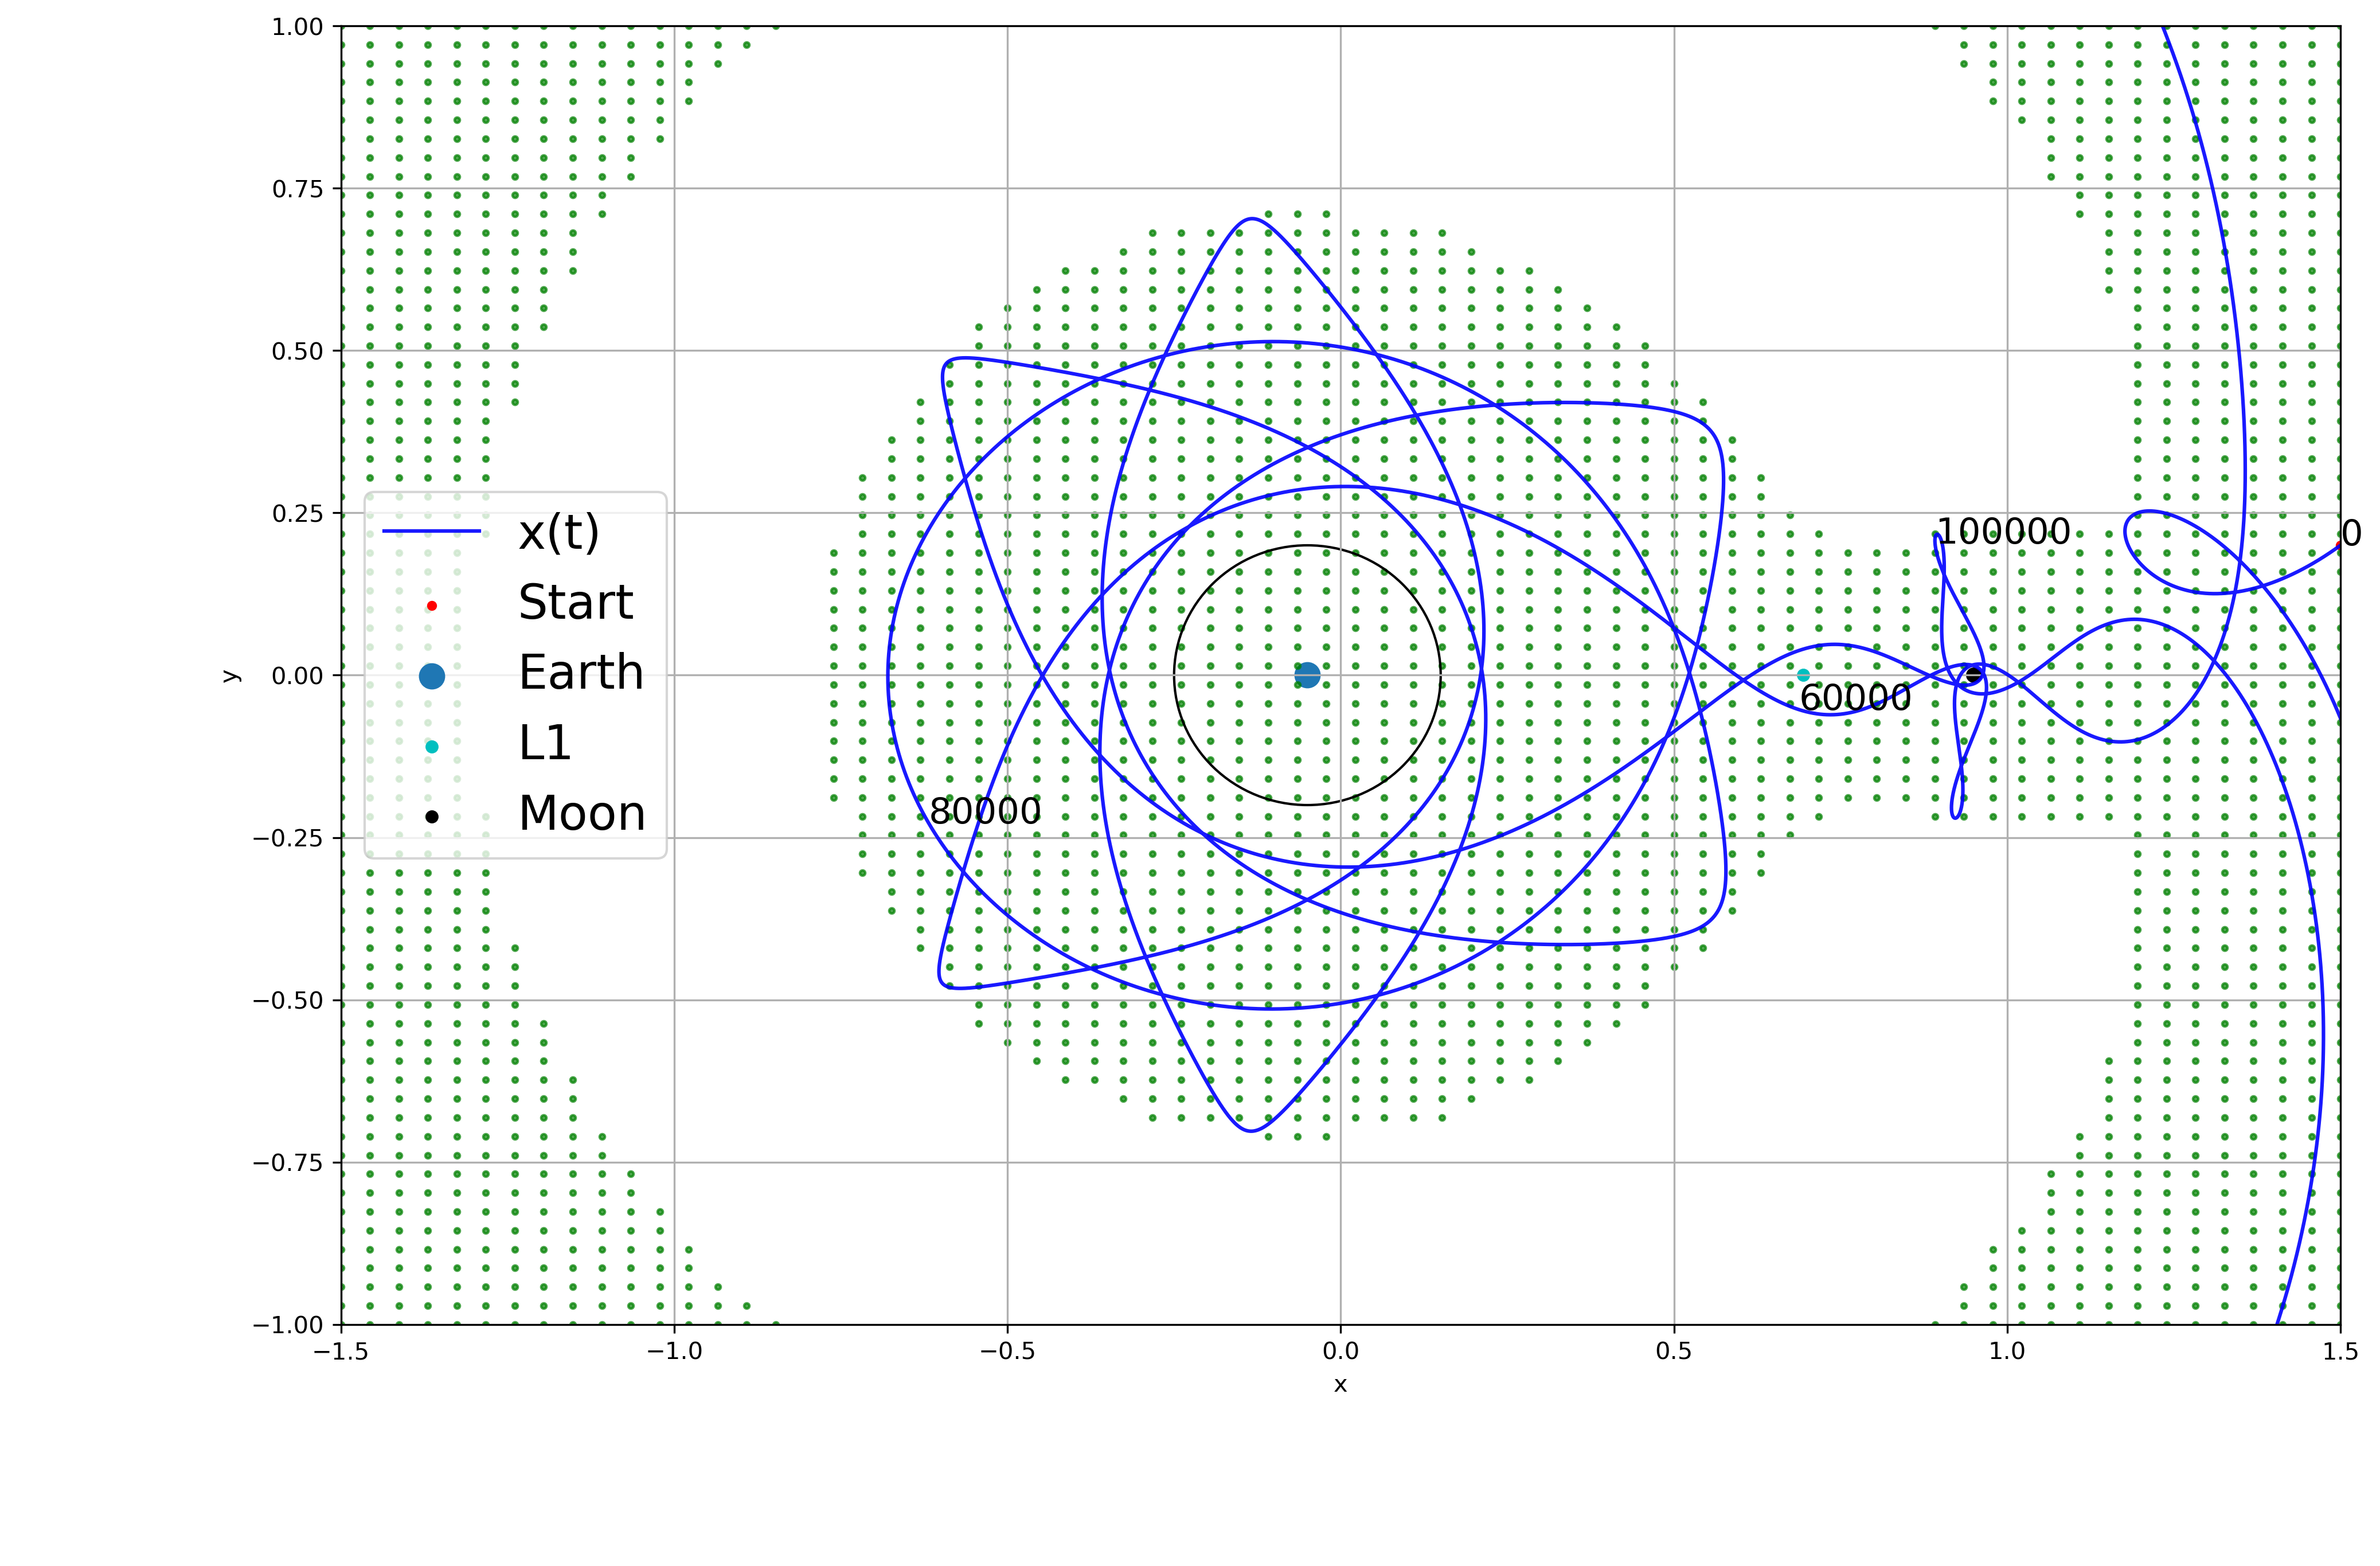

In [37]:
    
E = energy(x0,y_20,x_dot_0,y_dot_0)
print(E)
plot_dat(y0,EnergyPlot=True, MoonZoom=False)

-----

Aufgabe 6
------

In [30]:
#task6
x0   =  0-mu
y_20 = -0.2


x_dot_0 = 2.4044900000000013
y_dot_0 = -0.712 

p_x_0= x_dot_0-y_20                 # x_dot - y
p_y_0   = y_dot_0+x0

energies = []
omegas = []
ekins = []

y0 = [[x0],[y_20],[p_x_0],[p_y_0]]
delta = 0.0005
crash = False



for i in tqdm(range(150000)):
    if abs(sqrt((y0[0][-1]-(-mu))**2+(y0[1][-1]-0)**2))<0.2: #earth crash
        E = energy(x0,y_20,p_x_0,p_y_0)
        plot_dat(y0,EnergyPlot=True, MoonZoom=False, Crash=True)
        crash = True
        break
    if abs(sqrt((y0[0][-1]-(1-mu))**2+(y0[1][-1]-0)**2))<0.01: #moon crash
        E = energy(x0,y_20,p_x_0,p_y_0)
        plot_dat(y0,EnergyPlot=True, MoonZoom=False, Crash=True)
        crash = True
        break
                    
    energies.append(energy(y0[0][-1],y0[1][-1],y0[2][-1]+y0[1][-1],y0[3][-1]-y0[0][-1]))  
    omegas.append(omega(y0[0][-1],y0[1][-1]))                         
    ekins.append(e_kin(y0[2][-1]+y0[1][-1],y0[3][-1]-y0[0][-1]))        

    current = [y0[0][-1],
               y0[1][-1],
               y0[2][-1],
               y0[3][-1]]
    
    applyH2 = advance_H2_neu(current)
    applyH1 = advance_H1_neu(applyH2,delta)
    applyH2_again = advance_H2_neu(applyH1)
    
    next_step = applyH2_again
    
    y0[0].append(next_step[0])
    y0[1].append(next_step[1])
    y0[2].append(next_step[2])
    y0[3].append(next_step[3])
    

E = energy(x0,y_20,x_dot_0,y_dot_0)  

if not crash:
    plot_dat(y0,EnergyPlot=True, MoonZoom=False)

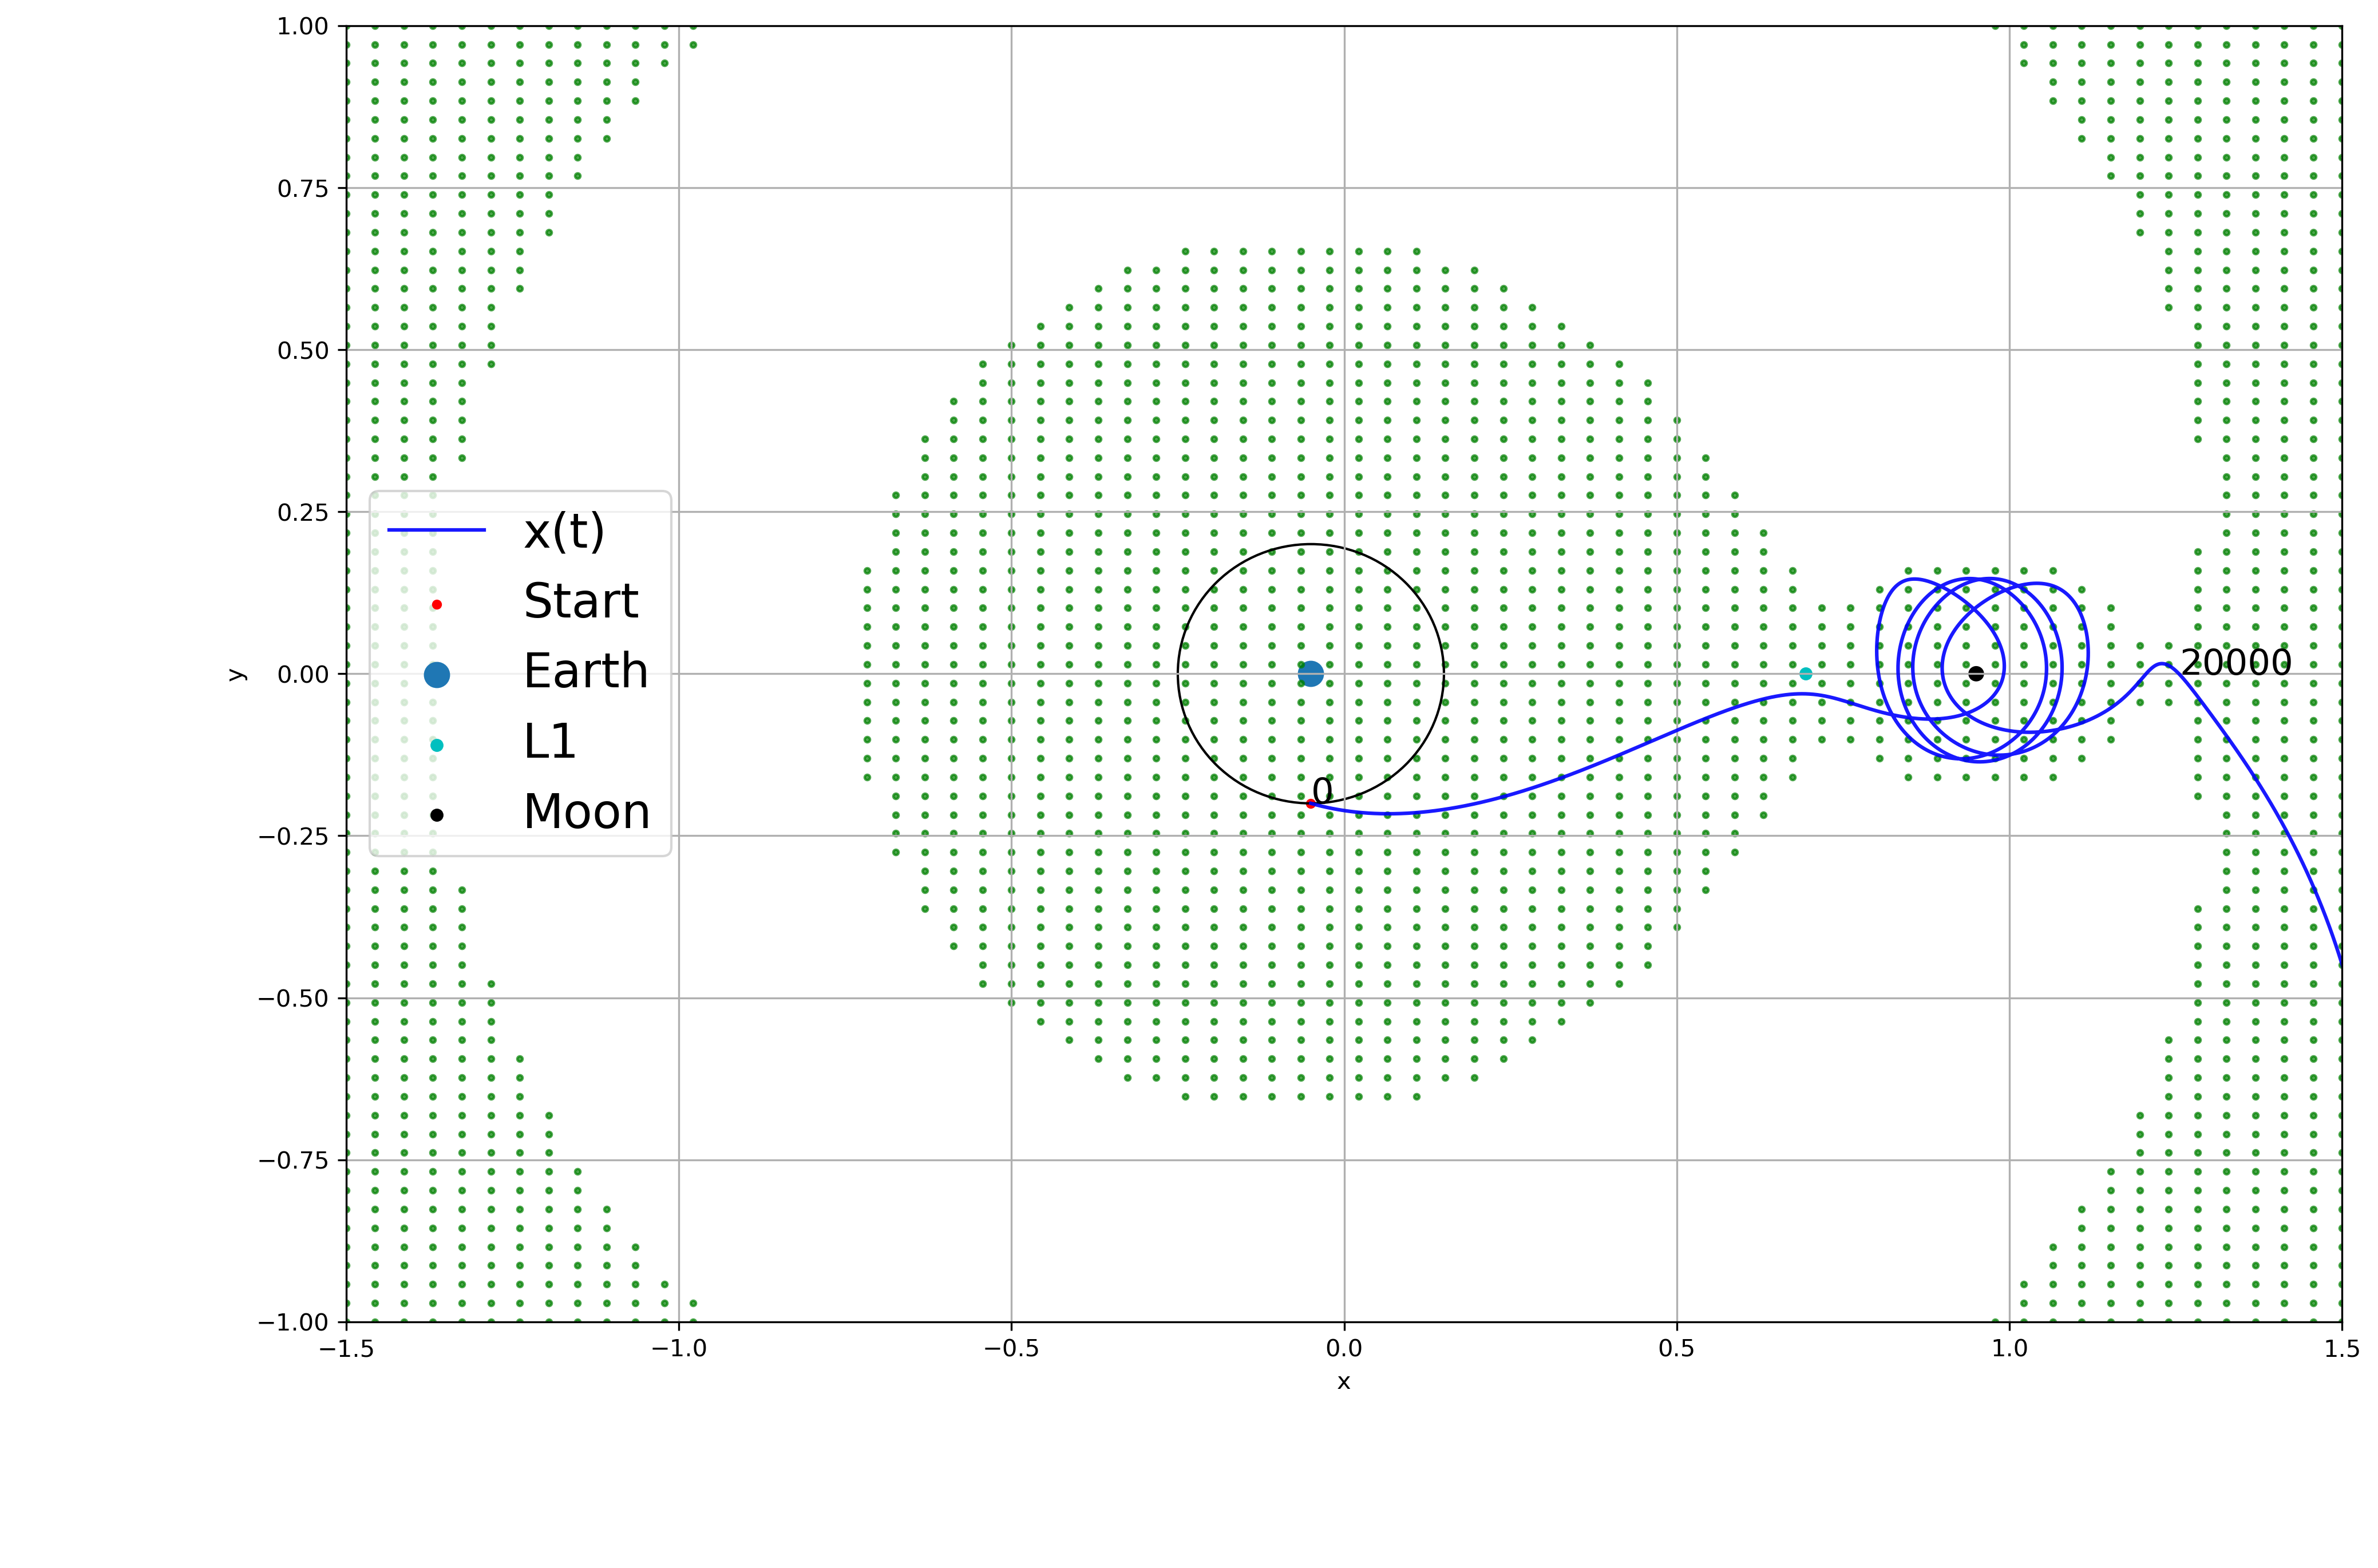

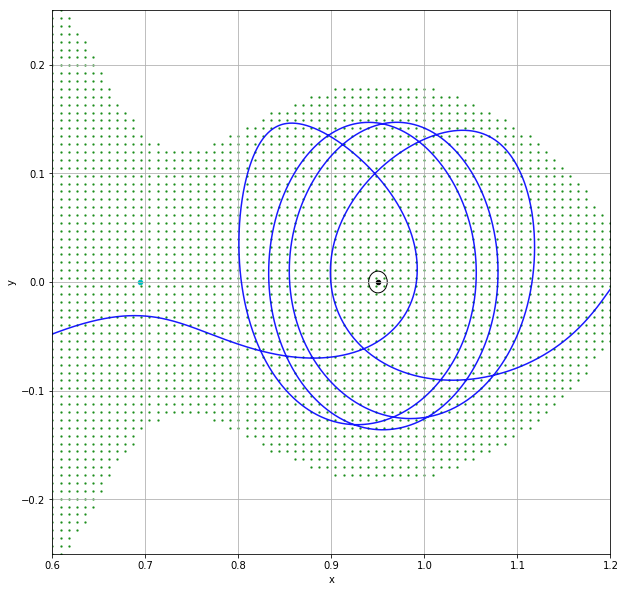

In [34]:
E = energy(x0,y_20,x_dot_0,y_dot_0)

plot_dat(y0,EnergyPlot=True, MoonZoom=True)

In [35]:
E

1.6997

-----

Aufgabe 5
------

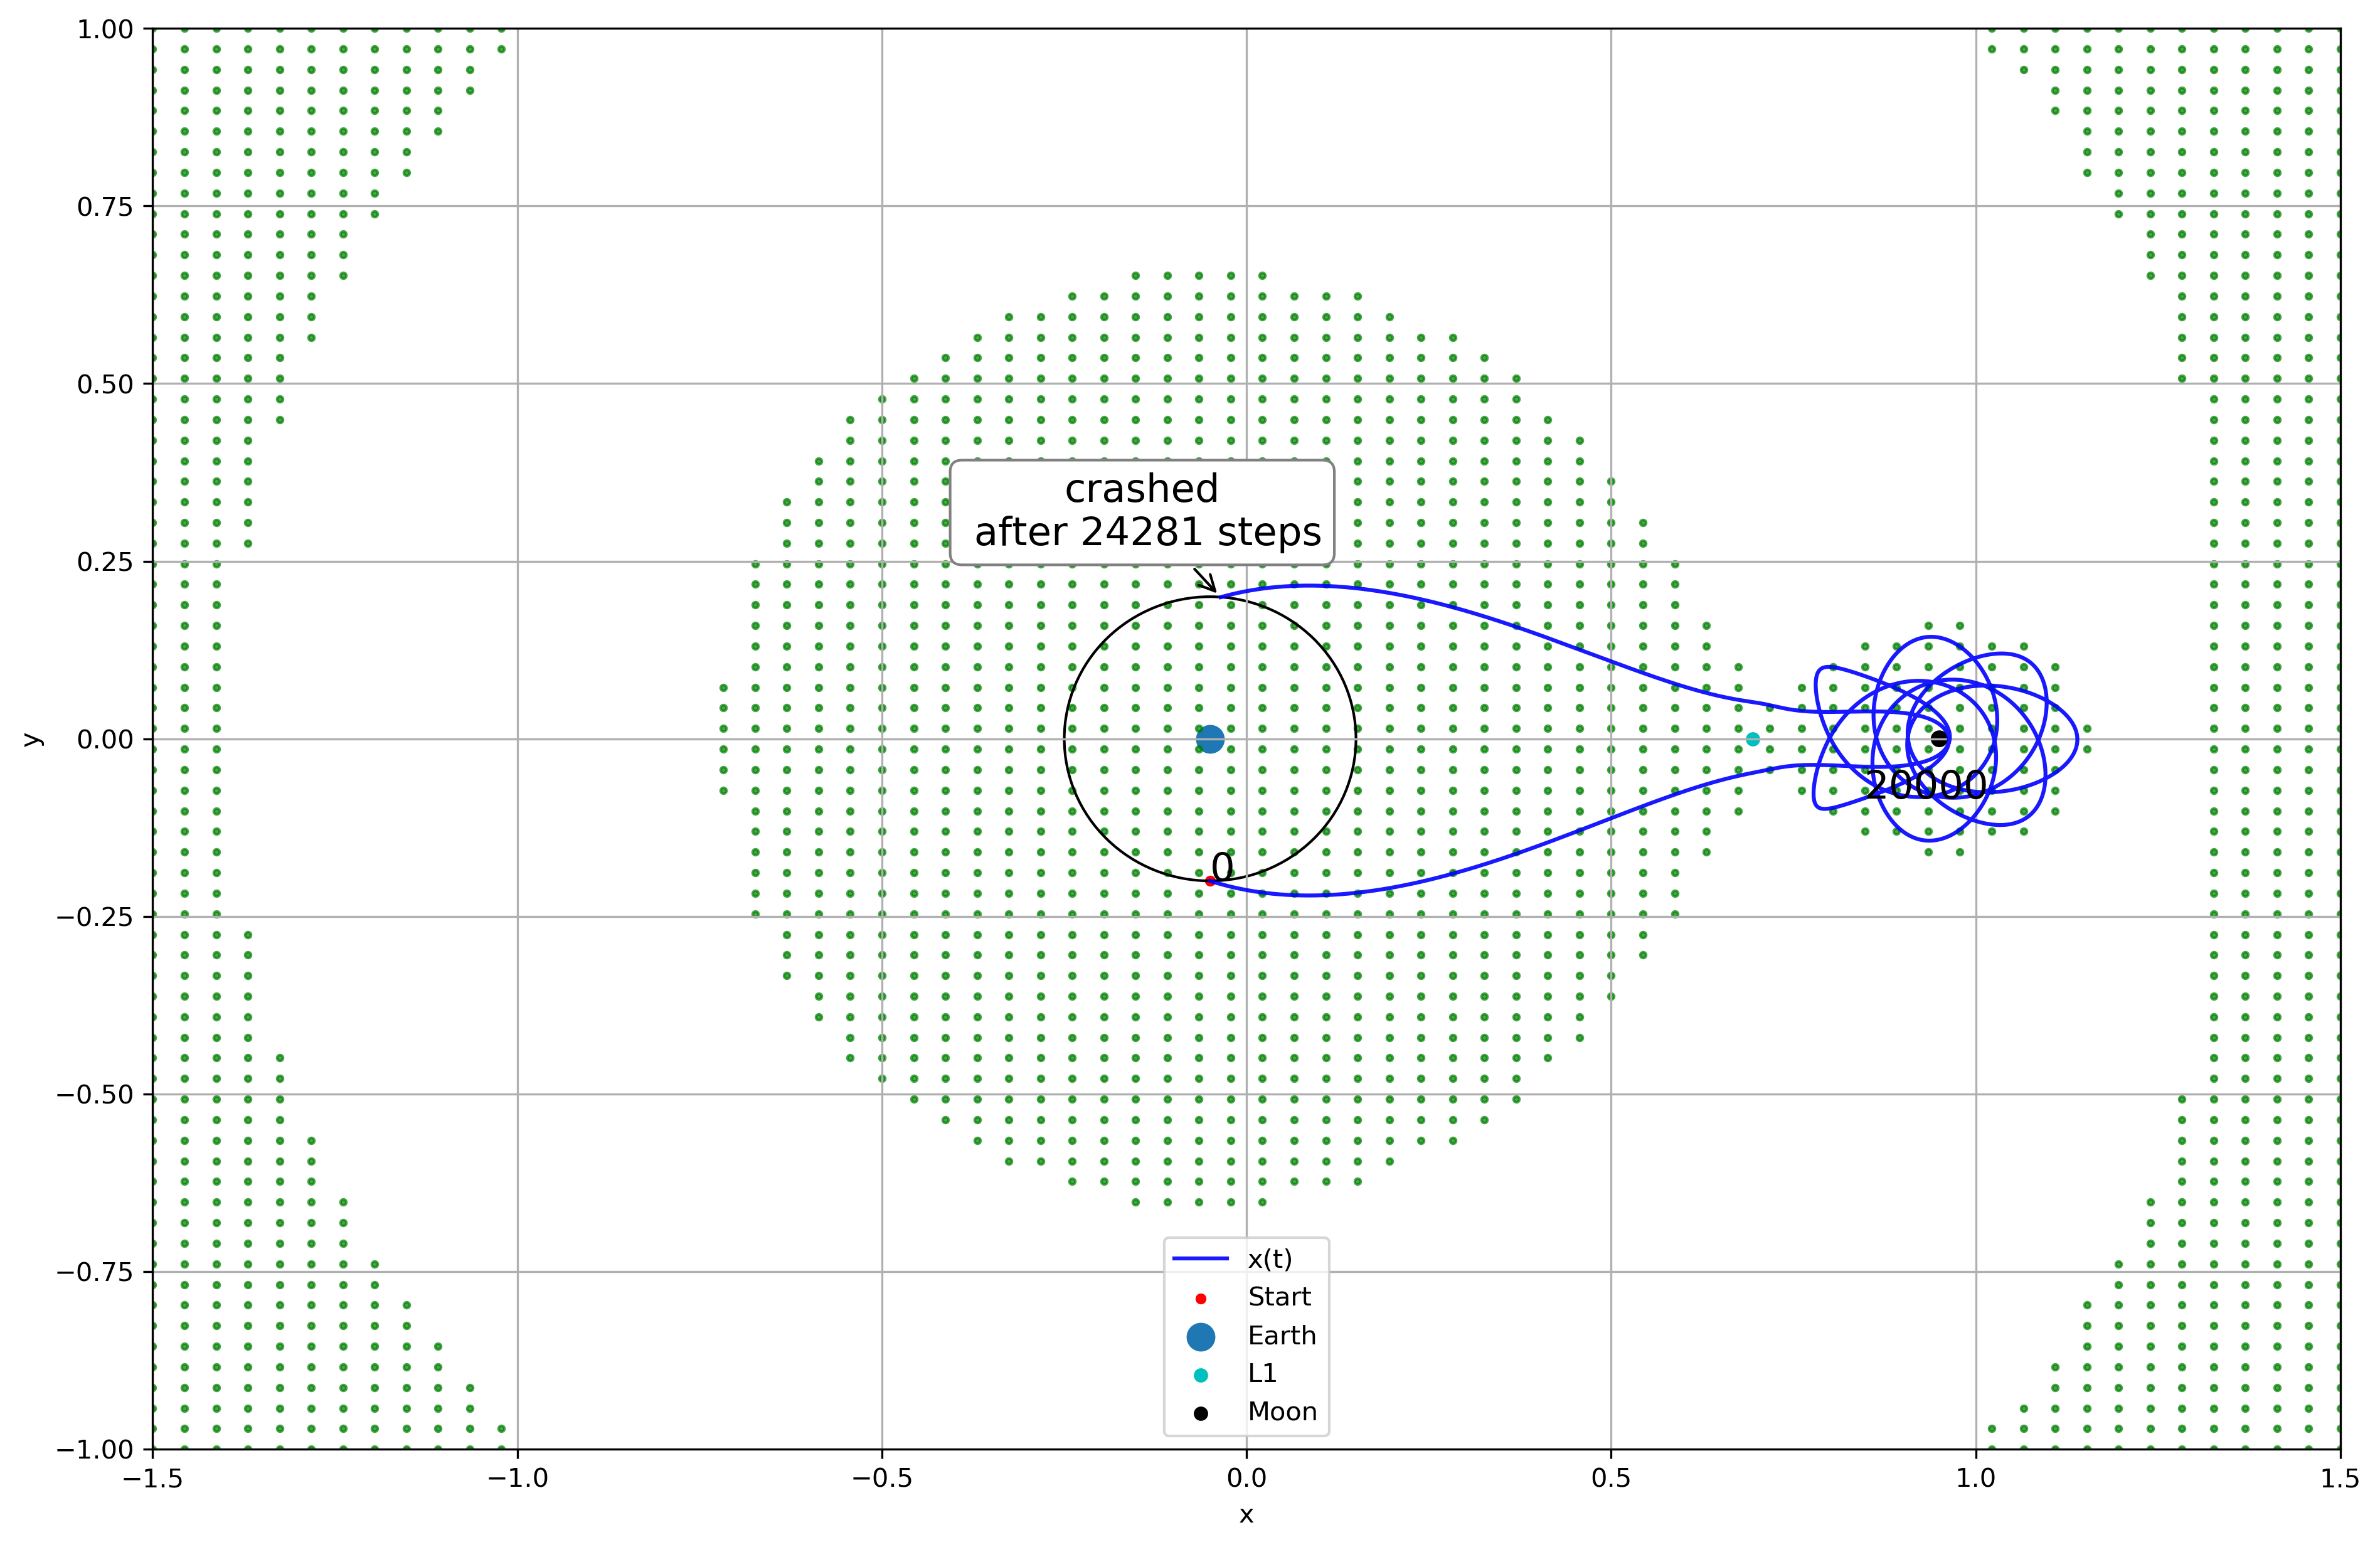

In [7]:
#task5
x0   =  0-mu
y_20 = -0.2
x_dot_0 = 2.37
y_dot_0 = -0.79  

p_x_0= x_dot_0-y_20                 # x_dot - y
p_y_0   = y_dot_0+x0

energies = []
omegas = []
ekins = []

y0 = [[x0],[y_20],[p_x_0],[p_y_0]]
delta = 0.0005
crash = False



for i in tqdm(range(150000)):
    if abs(sqrt((y0[0][-1]-(-mu))**2+(y0[1][-1]-0)**2))<0.2: #earth crash
        E = energy(x0,y_20,x_dot_0,y_dot_0)
        plot_dat(y0,EnergyPlot=True, MoonZoom=False, Crash=True)
        crash = True
        break
    if abs(sqrt((y0[0][-1]-(1-mu))**2+(y0[1][-1]-0)**2))<0.01: #moon crash
        E = energy(x0,y_20,x_dot_0,y_dot_0)
        plot_dat(y0,EnergyPlot=True, MoonZoom=False, Crash=True)
        crash = True
        break
                    
    energies.append(energy(y0[0][-1],y0[1][-1],y0[2][-1]+y0[1][-1],y0[3][-1]-y0[0][-1]))  
    omegas.append(omega(y0[0][-1],y0[1][-1]))                         
    ekins.append(e_kin(y0[2][-1]+y0[1][-1],y0[3][-1]-y0[0][-1]))        
    
    current = [y0[0][-1],
               y0[1][-1],
               y0[2][-1],
               y0[3][-1]]
    
    applyH2 = advance_H2_neu(current)
    applyH1 = advance_H1_neu(applyH2,delta)
    applyH2_again = advance_H2_neu(applyH1)
    
    next_step = applyH2_again
    
    y0[0].append(next_step[0])
    y0[1].append(next_step[1])
    y0[2].append(next_step[2])
    y0[3].append(next_step[3])
    

E = energy(x0,y_20,x_dot_0,y_dot_0)  #needed to plot green points

if not crash:
    plot_dat(y0,EnergyPlot=True, MoonZoom=False)

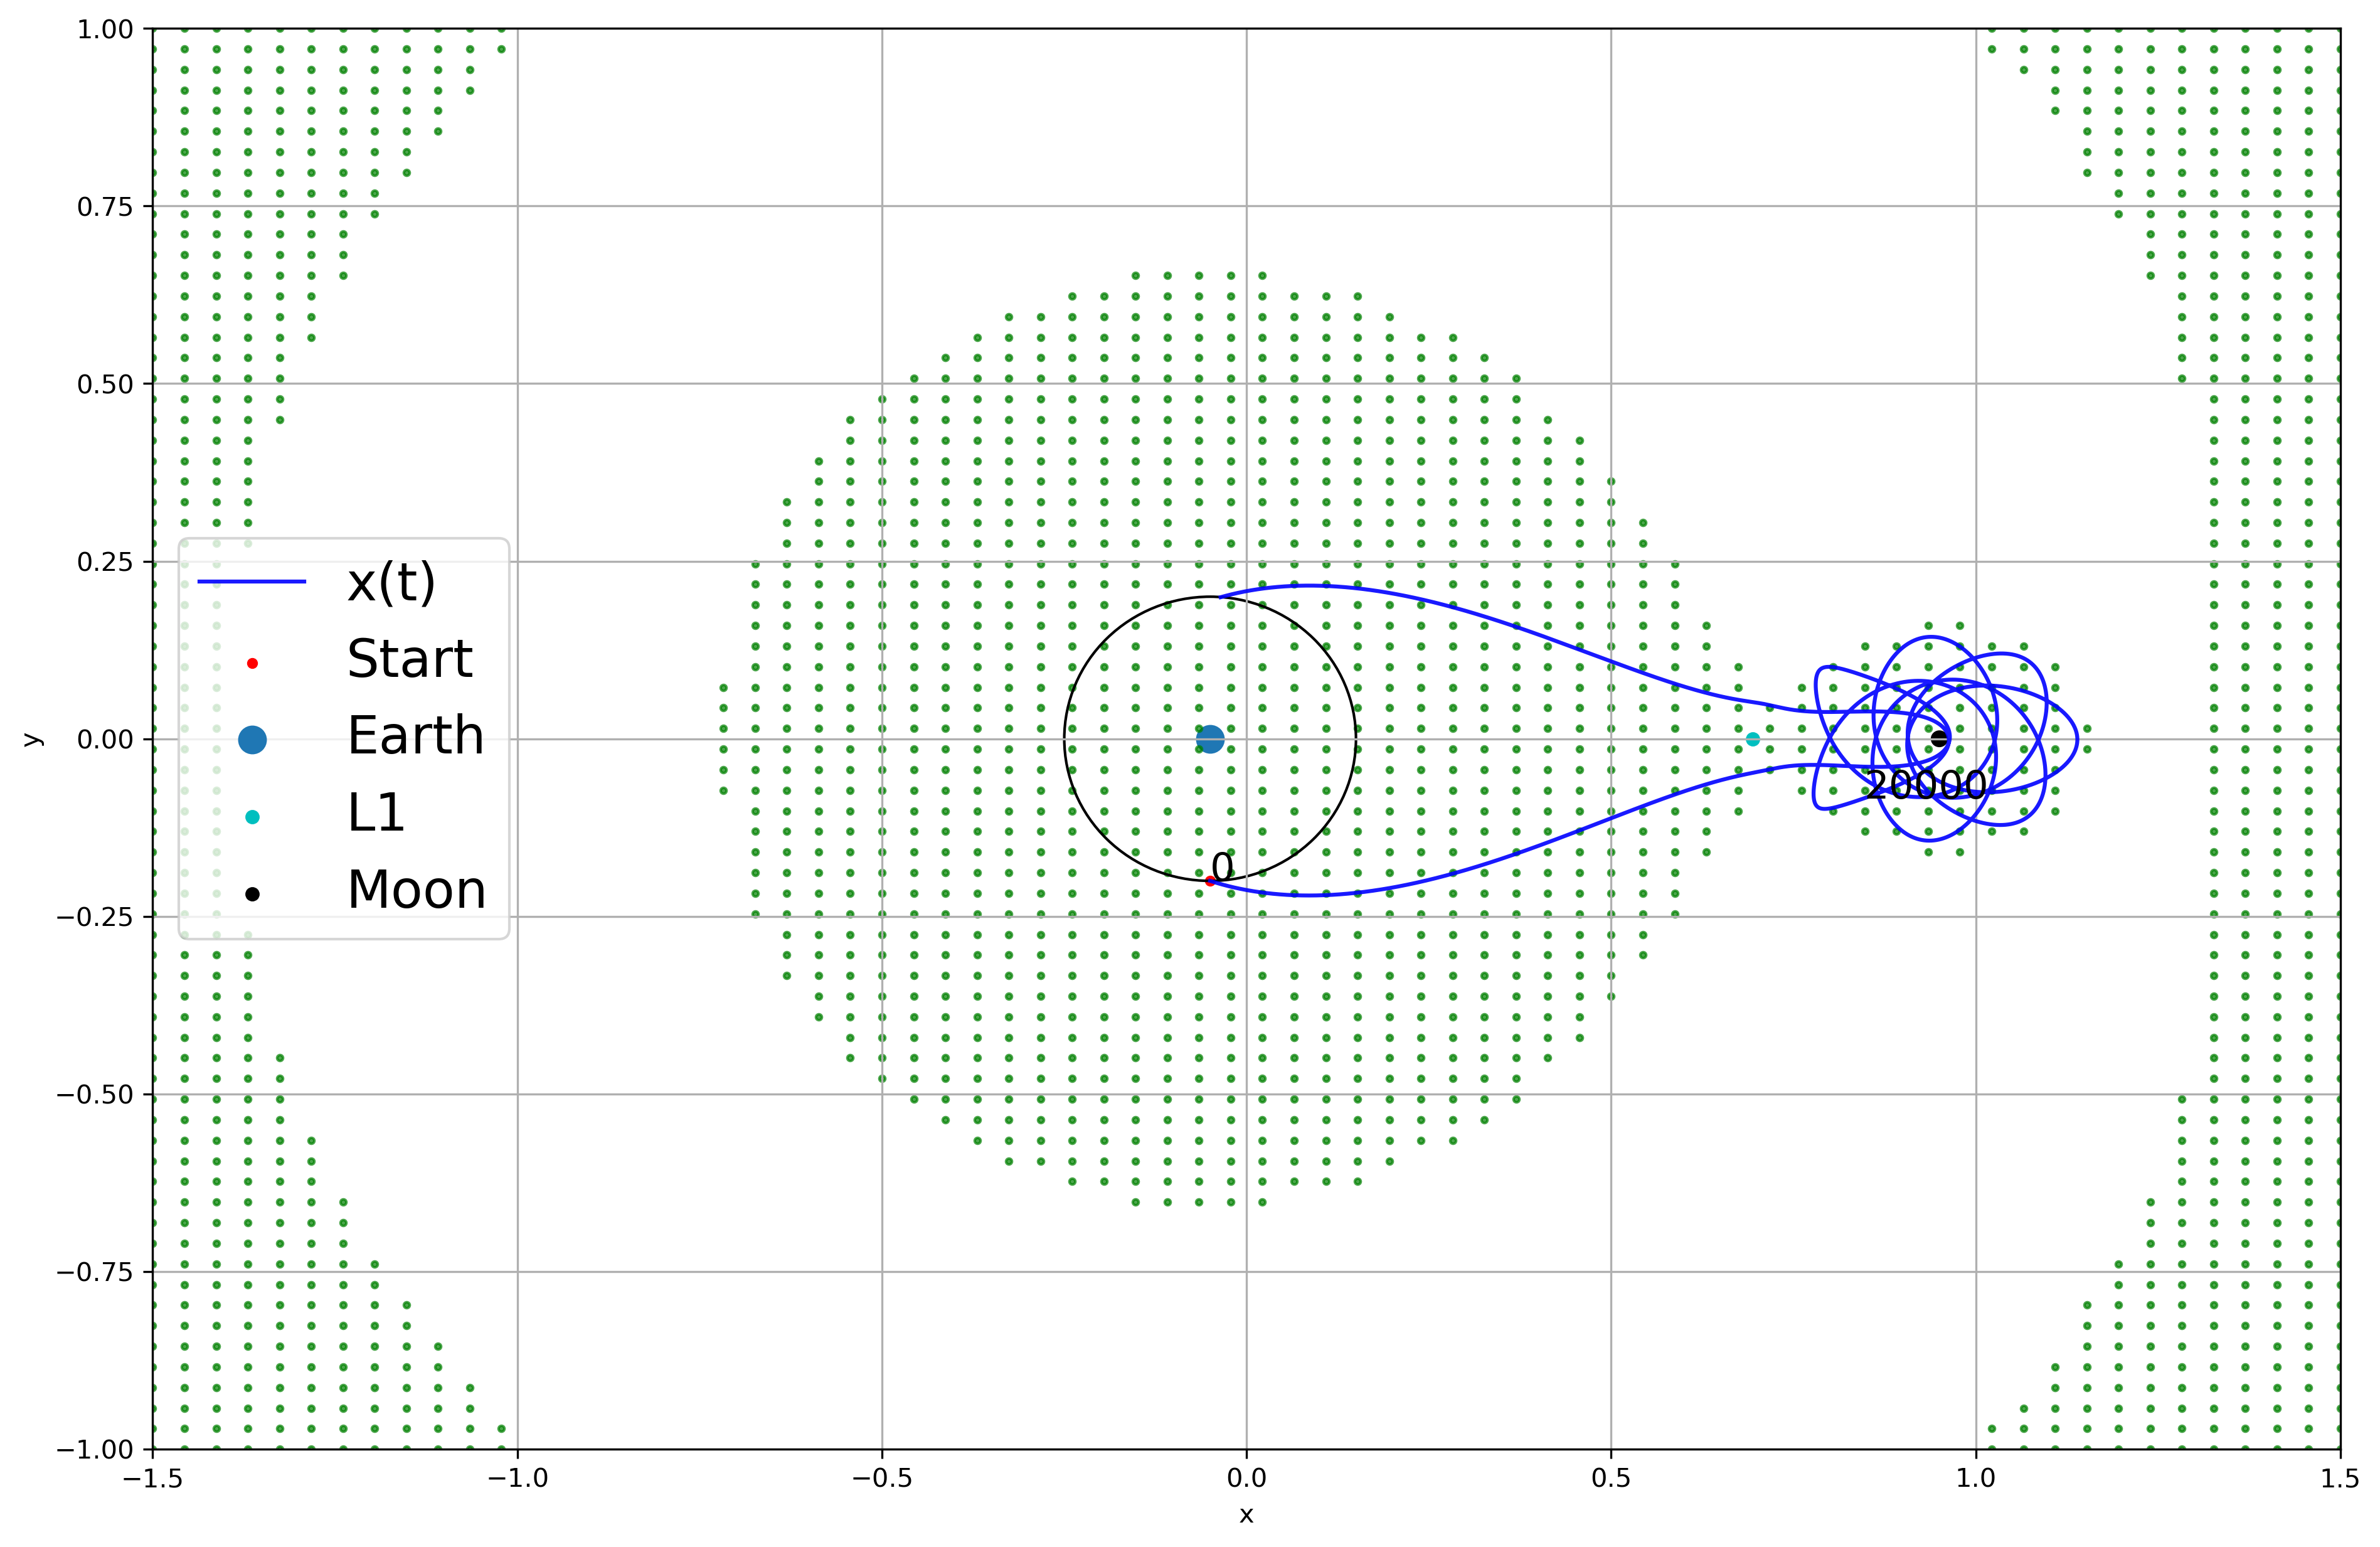

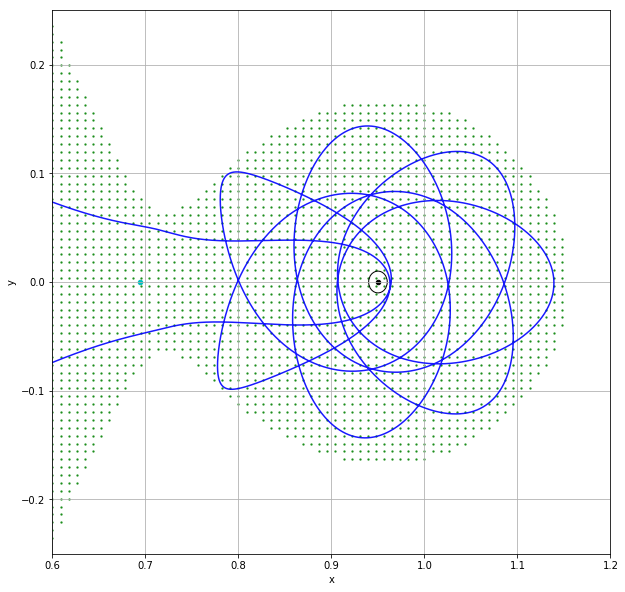

In [39]:
E = energy(x0,y_20,x_dot_0,y_dot_0)

plot_dat(y0,EnergyPlot=True, MoonZoom=True)

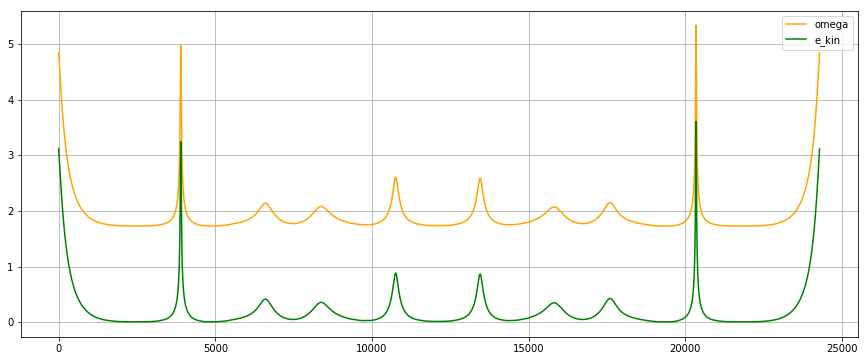

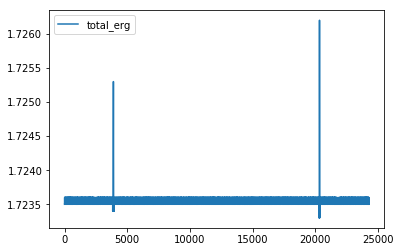

In [6]:
fig2 = plt.figure(figsize=(15,6))
plt.plot([i for i in range(len(energies))],omegas,label="omega",c="orange")
plt.plot([i for i in range(len(energies))],ekins,label="e_kin",c="g")
#plt.ylim(0,3)
plt.legend()
plt.grid()
plt.show()

plt.plot([i for i in range(len(energies))],energies,label="total_erg")
mean_erg = np.mean(energies)
#plt.ylim(mean_erg-mean_erg/2, mean_erg+mean_erg/4)
plt.legend()
plt.show()

The above plot shows the approximate conservation of energy to an acceptable degree.

In [33]:
#plotting routine


def plot_dat(y0, EnergyPlot, MoonZoom, Crash=False):
    xlim = 1.5
    ylim = 1
    xsize=xlim*10
    
    plt.figure(figsize=(xsize,xsize/(xlim/ylim)),dpi=300) 
    #plt.figure()
    ax=plt.gca()
    plt.plot(y0[0],y0[1], 'b', label='x(t)',alpha=0.9) 
    for j in range(len(y0[0])):
        if j%20000==0:
            plt.annotate(str(j),(y0[0][j],y0[1][j]),size=15)
            
    if Crash:
        plt.annotate("crashed\n after " + str(len(y0[0]))+ " steps",(y0[0][-1],y0[1][-1]) , bbox=dict(boxstyle="round", fc="1.0", ec="gray"),
            xytext=(-30, 20), textcoords='offset points', ha='center',size=15,
            arrowprops=dict(arrowstyle="->")
                    )
    plt.scatter(y0[0][0],y0[1][0],s=10,label="Start", color="r")
    plt.scatter(-mu,0,s=100,label="Earth")
    plt.scatter(0.744-mu,0,s=20,label="L1",color="c")
    plt.scatter(1-mu,0,s=20,label="Moon",color="k")
    #plt.legend(loc='best')
    plt.xlabel('x')
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    ax.add_patch(patches.Circle((-mu,0), radius=0.2, fill=None))
    ax.add_patch(patches.Circle((1-mu,0), radius=0.01, color="k", fill=None))
    plt.ylabel('y')
    plt.legend()
    
    #plotting green points showing the "allowed region" for the spacecraft
    if EnergyPlot:
        for x_value in np.linspace(-xlim,xlim,70):
            for y_value in np.linspace(-ylim,ylim,70):
                if omega(x_value,y_value)>=E:
                    plt.scatter(x_value,y_value,s=5,color="g",alpha=0.7)

    plt.grid()
    plt.show()
    
    
    
    if MoonZoom:
        plt.close()
        xlim = 1.2
        ylim = 0.25
        plt.figure(figsize=(10,10))#,dpi=100)
        #plt.figure()
        ax=plt.gca()
        plt.plot(y0[0],y0[1], 'b', label='x(t)',alpha=0.9) #0 and 2 are the x and y variables, respectively - place
        plt.scatter(y0[0][0],y0[1][0],s=10,label="Start", color="r")
        plt.scatter(-mu,0,s=100,label="Earth")
        plt.scatter(0.744-mu,0,s=20,label="L1",color="c")
        plt.scatter(1-mu,0,s=20,label="Moon",color="k")
        #plt.legend(loc='best')
        plt.xlabel('x')
        plt.xlim(0.6, xlim)
        plt.ylim(-ylim, ylim)
        ax.add_patch(patches.Circle((-mu,0), radius=0.2, fill=None))
        ax.add_patch(patches.Circle((1-mu,0), radius=0.01, color="k", fill=None))
        plt.ylabel('y')

        #hill region around x0,y0
        # hier dauerts auch wieder lange 
        for x_value in np.linspace(0.6,xlim,70):
            for y_value in np.linspace(-ylim,ylim,70):
                if omega(x_value,y_value)>=E:
                    plt.scatter(x_value,y_value,s=2,color="g",alpha=0.7)

        plt.grid()
        plt.show()

In [46]:
import pylab as plot
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plot.rcParams.update(params)

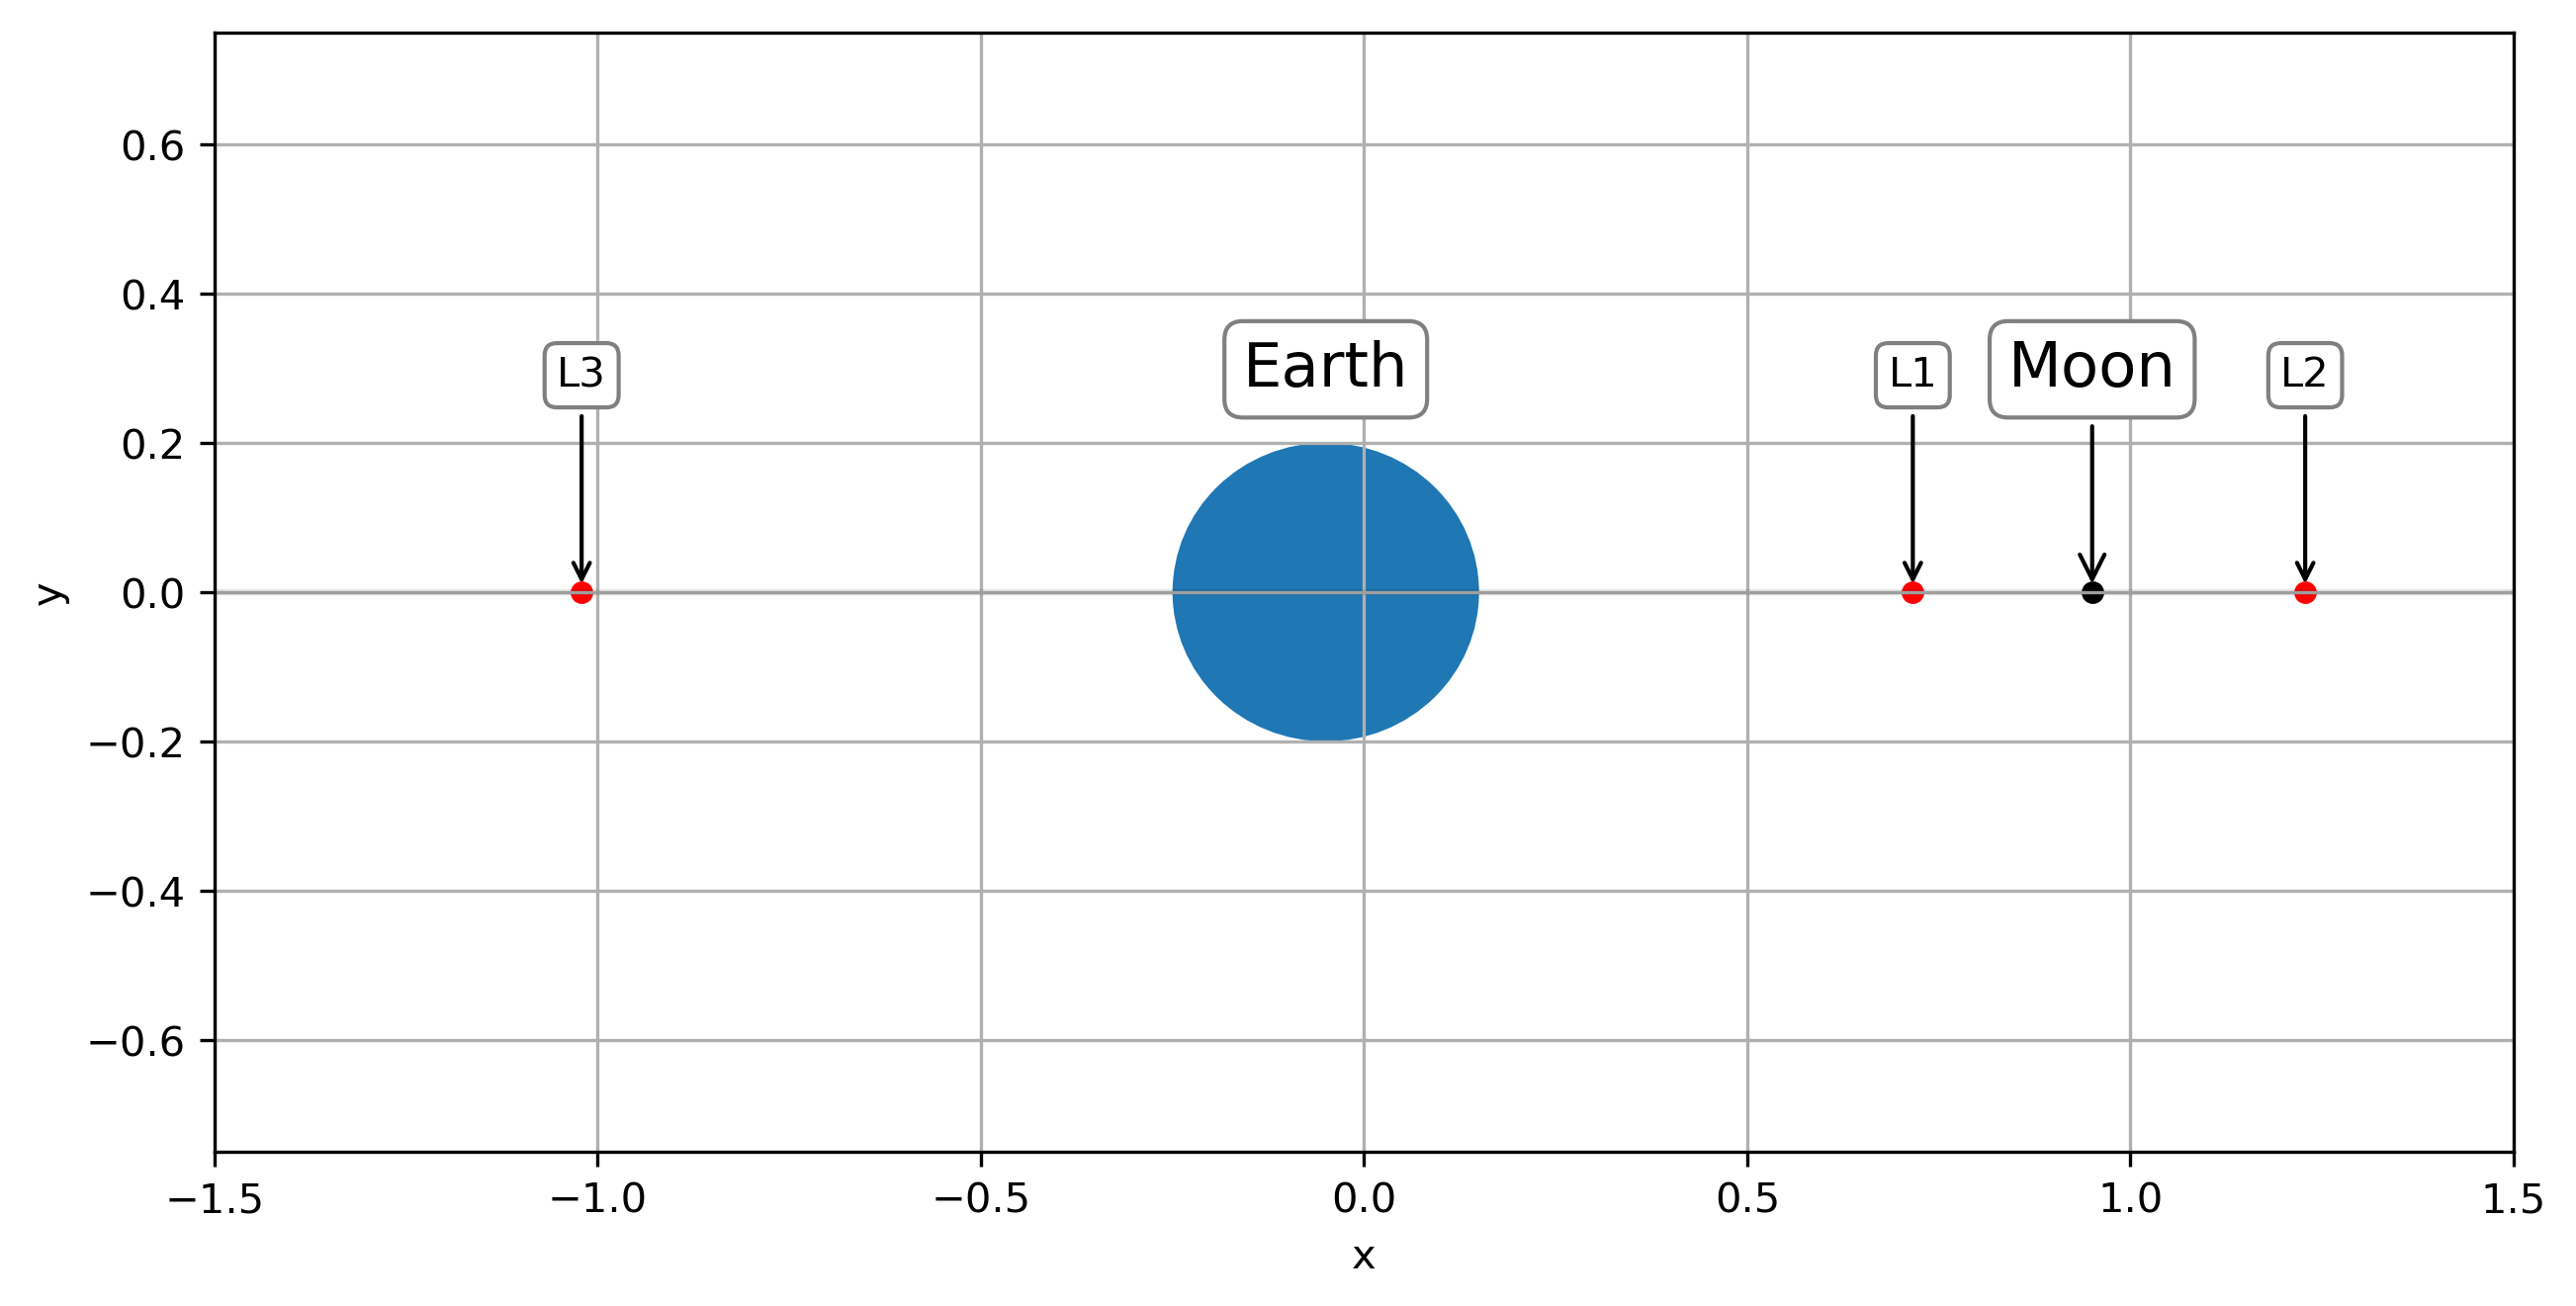

In [63]:
#making a plot of the Lagrange Points
bbox=dict(boxstyle="round", fc="1.0", ec="gray")
            

xlim = 1.5
ylim = 0.75


plt.figure(figsize=(10,5),dpi=300) 
#plt.figure()
ax=plt.gca()

plt.scatter(-mu,0,s=100,label="Earth")
plt.annotate("Earth",(-mu,0),size=15,bbox=bbox,xytext=(0, 50), textcoords='offset points', ha='center',
            )

plt.scatter(0.716,0,s=20,label="L1",color="r")
plt.annotate("L1",(0.716,0),size=10,bbox=bbox,xytext=(0, 50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.scatter(1.228,0,s=20,label="L2",color="r")
plt.annotate("L2",(1.228,0),size=10,bbox=bbox,xytext=(0, 50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.scatter(-1.021,0,s=20,label="L3",color="r")
plt.annotate("L3",(-1.021,0),size=10,bbox=bbox,xytext=(0, 50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.scatter(1-mu,0,s=20,label="Moon",color="k")
plt.annotate("Moon",(1-mu,0),size=15,bbox=bbox,xytext=(0, 50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
#plt.legend(loc='best')
plt.xlabel('x')
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
ax.add_patch(patches.Circle((-mu,0), radius=0.2, fill="c"))
ax.add_patch(patches.Circle((1-mu,0), radius=0.01, color="k", fill=None))
plt.ylabel('y')
#plt.legend()
ax.axhline(0,color="k",alpha=0.1)
plt.grid()
plt.show()

In [65]:
omega(1.228,0)

1.7009

In [66]:
omega(0.716,0)

1.734